# Nama/NIM: Cliffton S/0706022010001

Insert Library Yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer

Load Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ClifftonS/Data-Mining/main/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah.csv")
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


Cek Missing Value

In [3]:
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

Menghapus dan mengisi missing value

In [4]:
#mengisi dengan menggunakan modus
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

Mengubah data tipe kategori menggunakan labelencoder

In [5]:
lb = LabelEncoder()
df["Area Category"] = lb.fit_transform(df["Area Category"])
df["Nama Daerah"] = lb.fit_transform(df["Nama Daerah"])
df["Harga Penawaran (dari Owner)"] = lb.fit_transform(df["Harga Penawaran (dari Owner)"])
df["Terjual/Belum"] = lb.fit_transform(df["Terjual/Belum"])
df["Arah Hadap Rumah"] = lb.fit_transform(df["Arah Hadap Rumah"])
df["Posisi Rumah"] = lb.fit_transform(df["Posisi Rumah"])
df["Lebar Jalan Depan Rumah (ROW)"] = lb.fit_transform(df["Lebar Jalan Depan Rumah (ROW)"])
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,11,240.0,300.0,4.0,3.0,2.0,94,0,3,2,0
1,0,100,30.0,60.0,2.0,1.0,2.0,79,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0


Scaling data dengan standarization method

In [6]:
scale = StandardScaler()
dfscale = scale.fit_transform(df)
dfscale

array([[ 1.00437212, -1.37074241,  0.0647599 , ...,  0.83949741,
        -0.18806854, -0.8255808 ],
       [-1.67782395,  1.04750903, -0.97745709, ...,  0.83949741,
        -0.18806854,  0.22083437],
       [ 1.00437212, -0.36540192, -0.28264577, ..., -1.14184513,
        -5.4539876 , -0.8255808 ],
       ...,
       [-0.78375859,  0.31388219, -0.62012555, ..., -1.14184513,
        -0.18806854, -0.8255808 ],
       [ 1.00437212,  1.18336586, -0.63997731, ...,  0.83949741,
        -0.18806854,  1.26724954],
       [-1.67782395,  1.50942223, -0.16849819, ...,  0.83949741,
        -0.18806854,  1.26724954]])

# K-Means Clustering

Dengan elbow method, menggunakan range elbow range(1, 11)

In [7]:
# set the parameter for evaluating K
kmeans_kwargs = {"init": "k-means++","n_init": 10,"max_iter": 300,"random_state": 42}
sse = []
# check the inertia for each K
for k in range(1, 11):
    kmeansmodel = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeansmodel.fit(dfscale)
    sse.append(kmeansmodel.inertia_)

C:\Users\cliff\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training model K-Means pada dataset dengan jumlah cluster yang Anda tentukan

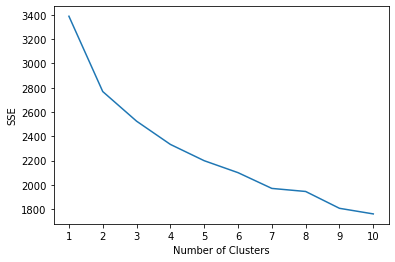

In [8]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Menggunakan Kneelocator untuk mencari elbow

In [9]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

Membagi menjadi 4 cluster

In [10]:
kmeans = KMeans(n_clusters=4,init="random").fit(dfscale)
sse.append(kmeansmodel.inertia_)
df_kmeans = kmeans.predict(dfscale)
df["Cluster"]=df_kmeans
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3,11,240.0,300.0,4.0,3.0,2.0,94,0,3,2,0,2
1,0,100,30.0,60.0,2.0,1.0,2.0,79,0,3,2,1,3
2,3,48,170.0,170.0,5.0,4.0,2.0,74,0,1,0,0,2
3,2,48,187.0,250.0,5.0,5.0,2.0,84,0,3,2,0,0
4,1,48,350.0,600.0,5.0,5.0,2.0,124,0,0,2,0,0


Menghitung jumlah cluster

In [11]:
df.groupby("Cluster").agg(Area_Category = ('Area Category',pd.Series.mode), Nama_Daerah = ('Nama Daerah',pd.Series.mode), Luas_Tanah = ('Luas Tanah (m2)', 'mean'), Luas_Bangunan = ('Luas Bangunan (m2)','mean'), Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'), Tingkat_Lantai = ('Tingkat/Lantai ','mean'), Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'), Terjual_Belum = ('Terjual/Belum', pd.Series.mode), Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode), Posisi_Rumah = ('Posisi Rumah', pd.Series.mode), Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ("Cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
Cluster,,,,,,,,,,,,,
0,1,11,221.806122,294.234694,4.979592,4.142857,2.102041,104.244898,0,3,2,0,98
1,2,"[11, 28, 82]",598.326087,654.152174,6.347826,5.173913,1.945652,69.260870,0,3,2,2,46
2,3,"[11, 30, 73]",129.563636,151.236364,3.472727,2.554545,1.727273,77.436364,0,3,2,0,110
3,0,"[11, 30, 114]",118.314815,121.814815,2.870370,1.907407,1.601852,59.703704,0,3,2,0,54


# Hierarchical Clustering

Membuat plot dendogram

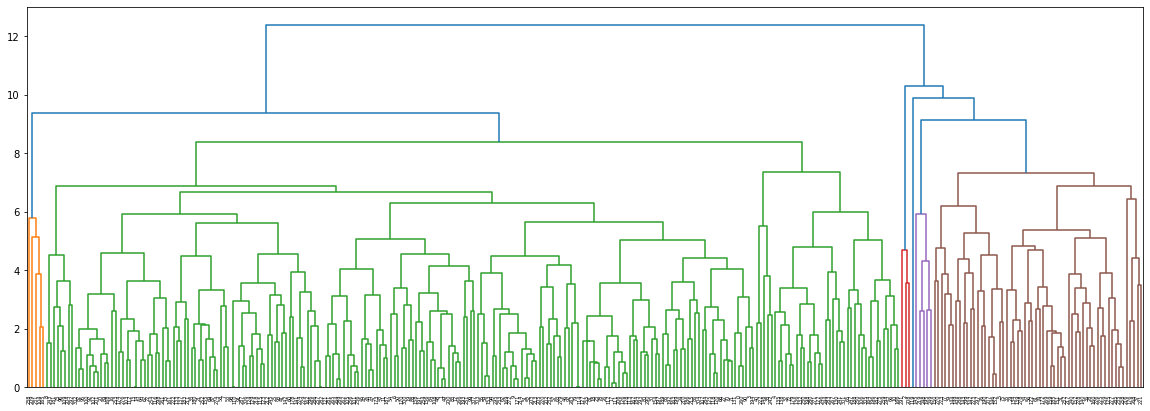

In [12]:
plt.figure(figsize=(20,7))
linkage_data = linkage(dfscale, method='complete')
dendrogram(linkage_data)
plt.show()

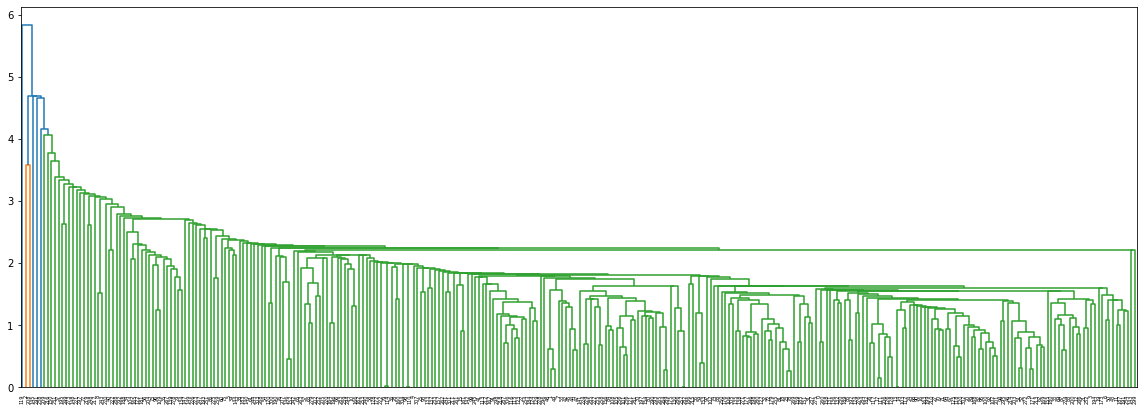

In [13]:
plt.figure(figsize=(20,7))
linkage_data = linkage(dfscale, method='single')
dendrogram(linkage_data)
plt.show()

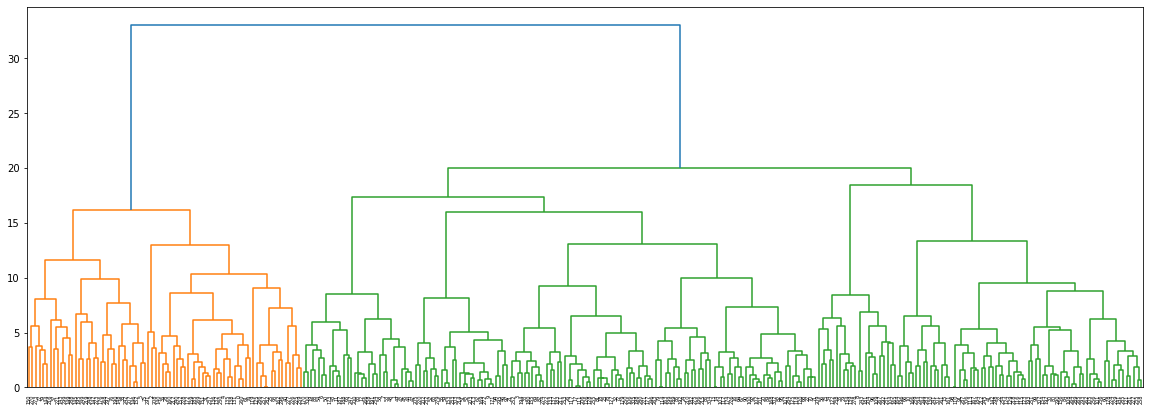

In [14]:
plt.figure(figsize=(20,7))
linkage_data = linkage(dfscale, method='ward')
dendrogram(linkage_data)
plt.show()

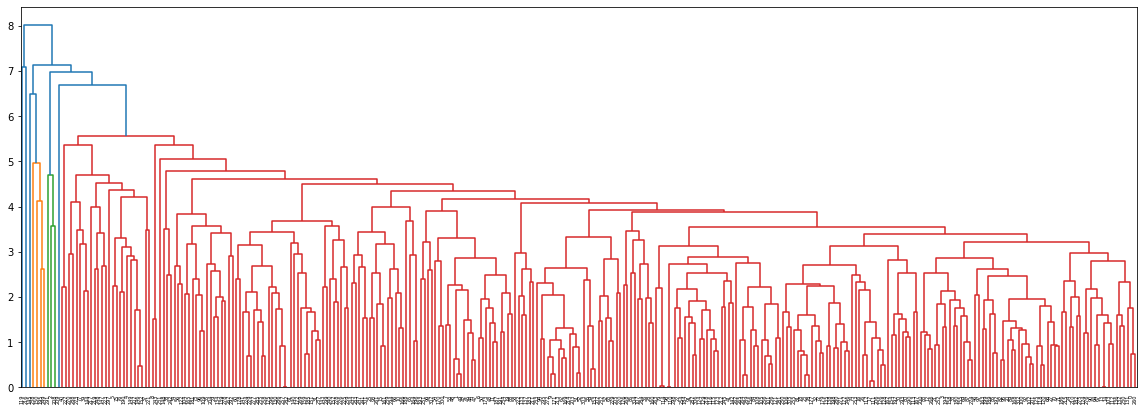

In [15]:
plt.figure(figsize=(20,7))
linkage_data = linkage(dfscale, method='average')
dendrogram(linkage_data)
plt.show()

Lakukan hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans

In [16]:
#Clustering Model Hierarchical
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
labels = hierarchical_cluster.fit_predict(dfscale)
print(labels)

[1 0 1 0 1 1 0 0 3 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 1 0 0 1 3 2 1 0 0 3 3 1
 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 2 1 0 0 0 0 2 0 0 0 0 0 0 3
 1 1 1 1 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 1 0 0 3 0 2 2 0 2 0 0 3 2 0 0 2 3 2
 0 0 2 0 2 2 0 0 1 0 2 3 2 2 0 0 0 0 2 2 1 1 0 3 1 1 0 1 3 1 2 2 1 1 1 1 1
 1 1 1 1 1 0 2 0 2 1 0 1 1 2 1 0 2 3 2 2 0 0 0 0 1 0 0 1 1 0 2 0 0 3 0 0 2
 1 0 0 0 0 1 0 0 2 0 1 2 2 0 0 0 0 0 0 3 0 0 1 1 3 0 0 2 0 0 0 1 1 2 1 0 1
 0 1 2 1 1 1 1 2 1 3 0 0 0 2 2 1 3 2 1 2 1 3 2 2 0 0 1 1 0 2 0 0 2 0 2 1 2
 1 1 2 2 0 2 2 0 3 1 1 1 0 0 1 0 0 0 2 3 0 0 2 1 2 0 2 1 2 1 2 2 1 3 2 2 0
 1 1 2 1 0 2 0 0 0 0 2 2]


Tampilkan dalam bentuk dataframe kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas

In [17]:
df["Cluster"] = labels

df.groupby("Cluster").agg(Area_Category = ('Area Category',pd.Series.mode), Nama_Daerah = ('Nama Daerah',pd.Series.mode), Luas_Tanah = ('Luas Tanah (m2)', 'mean'), Luas_Bangunan = ('Luas Bangunan (m2)','mean'), Jumlah_Kamar = ('Jumlah Kamar','mean'), Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi','mean'), Tingkat_Lantai = ('Tingkat/Lantai ','mean'), Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'), Terjual_Belum = ('Terjual/Belum', pd.Series.mode), Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode), Posisi_Rumah = ('Posisi Rumah', pd.Series.mode), Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ("Cluster",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
Cluster,,,,,,,,,,,,,
0,3,73,129.549296,155.943662,3.436620,2.584507,1.767606,81.690141,0,3,2,0,142
1,1,11,457.447368,536.368421,6.026316,4.868421,2.006579,91.302632,0,3,2,0,76
2,"[1, 3]",11,182.867647,203.058824,4.000000,3.147059,1.860294,65.058824,0,3,2,2,68
3,1,30,195.636364,246.545455,4.500000,3.500000,1.909091,99.136364,0,3,3,0,22
